# FIFA Worldcup 1930-2014 
### An Exploratory Data Analysis.

An informative dataset of all the FIFA Worldcup Matches from the beginning i.e. 1930 up until 2014 has been picked up from Kaggle.(https://www.kaggle.com/abecklas/fifa-world-cup) 
We will be performing some cleaning and relative analysis on the dataset to draw some conclusion with the help of data analysis libraries(pandas, numpy) and data visualization libraries (matplotlib, seaborn). 

### Downloading the Libraries
The libraries that will be utilized for the length of this project are:
<br>Pandas
<br>NumPy
<br>Matplotlib
<br>Seaborn
<br>Jovian
<br>We shall download and import the above mentioned libraries.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
!pip install numpy seaborn pandas matplotlib


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jovian
%matplotlib inline

### Loading the Data set
<br>We will be dealing with 3 data sets.
<br>WorldCupMatches - contains all the matches and their details
<br>WorldCups- contains all the 84 world cup matches and some information about each
<br>WorldCupPlayers - contains individual player information

In [4]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/abecklas/fifa-world-cup'
od.download('https://www.kaggle.com/abecklas/fifa-world-cup')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: radhikaganapathy
Your Kaggle Key: ········


100%|██████████| 349k/349k [00:00<00:00, 90.1MB/s]

In [5]:
wc_matches_df = pd.read_csv('fifa-world-cup/WorldCupMatches.csv')
wc_cup_df = pd.read_csv('fifa-world-cup/WorldCups.csv')
wc_players_df = pd.read_csv('fifa-world-cup/WorldCupPlayers.csv')

In [6]:
project_name = "radhika-course-project" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "radhikag99/radhika-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/radhikag99/radhika-course-project


'https://jovian.ml/radhikag99/radhika-course-project'

### Data Preparation and Cleaning

We will now go through each csv file and clean the data sets which means we will eliminate the irrelevant rows and colums and fill the empty cells with appropriate content so that our analysis is not hindered by the missing values later on.



Lets have a look at how the data sets are arranged and make note of what needs to be elimminated.

In [10]:
wc_matches_df.tail() #There are numerous rows containing undesired values

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
wc_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [12]:
wc_cup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [13]:
wc_players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


#### From above information:
<br> We shall eliminates the follwing colums from the datasets.
<br> WorldCupMatches - Half-time Home Goals, Half-time Away Goals, Referees, Assistant 1&2, Home Team Initials, Away Team Initials
<br> WorldCupPlayers- Line-up, Position, Shirt Number, Position, Event 

We shall also elimate the rows that have Nan values.

In [14]:
wc_matches_df.drop(wc_matches_df.index[852:], inplace=True) #removed all the nan rows from the main dataframe
wc_matches_df.fillna(0, inplace=True)
wc_cup_df.fillna(0, inplace=True)
wc_players_df.fillna(0, inplace=True)

In [15]:
wc_matches_df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [16]:
wc_matches_df.drop(columns=['Win conditions', 'Half-time Home Goals','Half-time Away Goals','Referee','Assistant 1','Assistant 2','Home Team Initials','Away Team Initials'], inplace=True)

In [17]:
wc_matches_df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,RoundID,MatchID
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,201.0,1096.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,201.0,1090.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,201.0,1093.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,2549.0,201.0,1098.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,23409.0,201.0,1085.0
...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,51179.0,255953.0,300186488.0
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,58141.0,255955.0,300186474.0
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,63267.0,255955.0,300186490.0
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,68034.0,255957.0,300186502.0


In [18]:
wc_cup_df.drop(columns=['Attendance'], inplace=True)

In [19]:
wc_cup_df

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38


In [20]:
wc_players_df.drop(columns=['Line-up', 'Shirt Number','Position','Event'], inplace=True)

In [21]:
wc_players_df

,RoundID,MatchID,Team Initials,Coach Name,Player Name
0,201,1096,FRA,CAUDRON Raoul (FRA),Alex THEPOT
1,201,1096,MEX,LUQUE Juan (MEX),Oscar BONFIGLIO
2,201,1096,FRA,CAUDRON Raoul (FRA),Marcel LANGILLER
3,201,1096,MEX,LUQUE Juan (MEX),Juan CARRENO
4,201,1096,FRA,CAUDRON Raoul (FRA),Ernest LIBERATI
...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),ALVAREZ
37780,255959,300186501,GER,LOEW Joachim (GER),KHEDIRA
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),AGUERO
37782,255959,300186501,GER,LOEW Joachim (GER),MUSTAFI


#### Now, we have the desired data sets after cleaning and prepping the original data sets.

In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "radhikag99/radhika-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/radhikag99/radhika-course-project


'https://jovian.ml/radhikag99/radhika-course-project'

## Exploratory Analysis and Visualization
We shall now look at a rough representation of some of the data in the stored dataframes to get an idea about what we are dealing with.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### No. of Goals Scored each World Cup

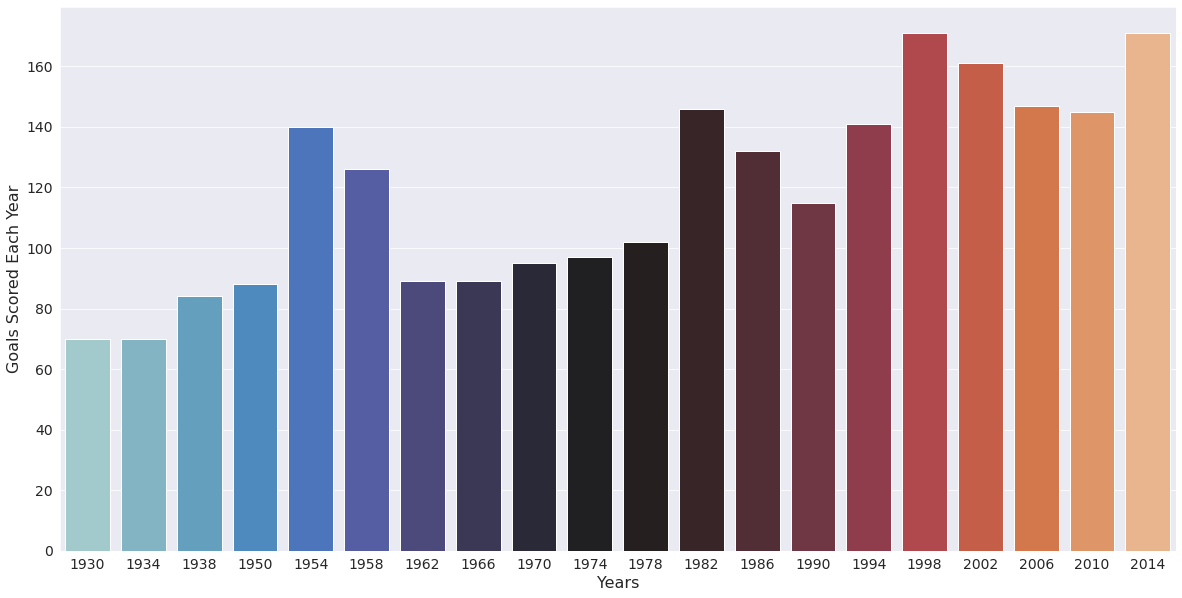

In [25]:
#plt.bar(wc_cup_df.Year, wc_cup_df.GoalsScored,width = 1)

plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(x = wc_cup_df.Year, y = wc_cup_df.GoalsScored, palette = 'icefire');
plt.xlabel(xlabel = 'Years', fontsize = 16);
plt.ylabel(ylabel = 'Goals Scored Each Year', fontsize = 16);

#sns.lmplot(x="Year", y="GoalsScored",data=wc_cup_df,width=2)

#### Plotting Matches Played and Teams qualified each year.
<br> Looks like both reach a constant after 1998

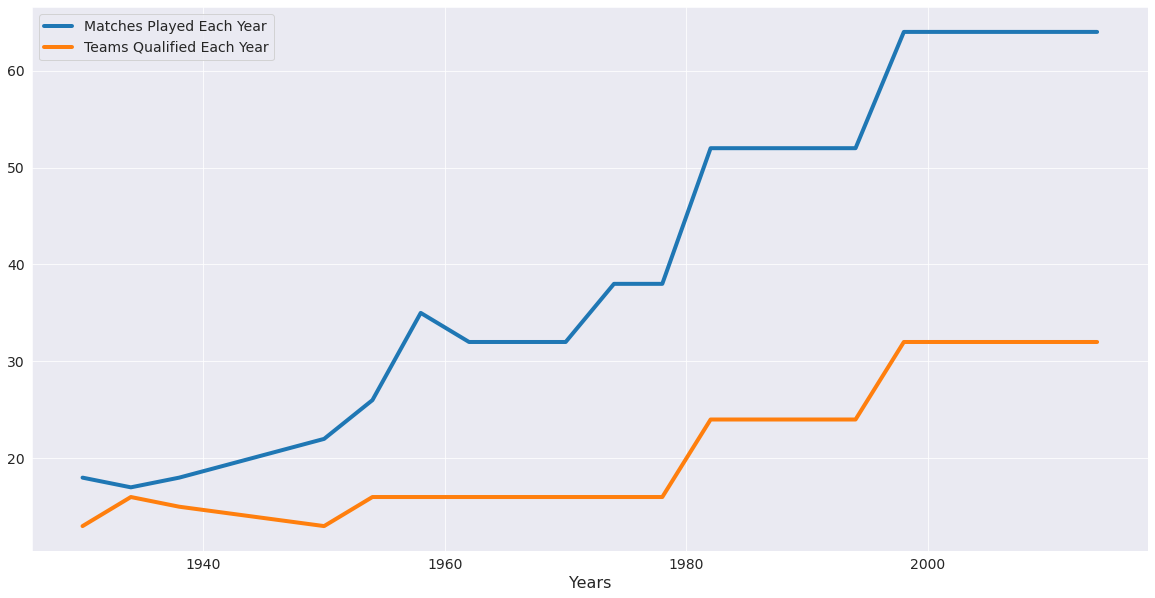

In [26]:
sns.lineplot(data=wc_cup_df, x="Year", y="MatchesPlayed", label="Matches Played Each Year" , linewidth=4);
sns.lineplot(data=wc_cup_df, x="Year", y="QualifiedTeams",label="Teams Qualified Each Year", linewidth=4);
plt.xlabel(xlabel = 'Years', fontsize = 16);
plt.ylabel(ylabel = '', fontsize = 16);

#### Winners of the World Cup

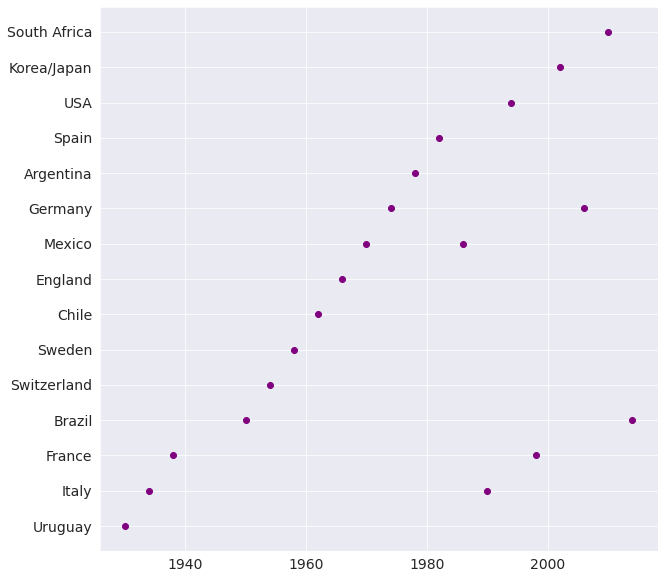

<Figure size 1512x432 with 0 Axes>

In [27]:
plt.rcParams['figure.figsize'] = (10, 10)
#colors = np.random.rand(50)
plt.scatter(wc_cup_df.Year,wc_cup_df.Country,c='purple', alpha=1)
#sns.relplot(x="Year", y="Country", data=wc_cup_df);
plt.figure(figsize=(21,6));

Let us save and upload our work to Jovian before continuing

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "radhikag99/radhika-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/radhikag99/radhika-course-project


'https://jovian.ml/radhikag99/radhika-course-project'

## Question and Answers
Let us perform an analysis on the datasets imported by raising relevant questions and answering them with mathematical computations and graphical representations.

#### Q1: Which particular world cup match had the most number of spectators?

In [30]:
match_attendance = np.array(wc_matches_df.Attendance)
match_attendance 

array([  4444.,  18346.,  24059.,   2549.,  23409.,   9249.,  18306.,
        18306.,  57735.,   2000.,  42100.,  25466.,  12000.,  70022.,
        41459.,  72886.,  79867.,  68346.,  16000.,   9000.,  33000.,
        14000.,   8000.,  21000.,  25000.,   9000.,  12000.,   3000.,
        35000.,  23000.,  43000.,  35000.,  15000.,   7000.,  55000.,
        27152.,   9000.,  30454.,   7000.,  19000.,  13452.,  11000.,
         8000.,  20025.,  22021.,  15000.,   7000.,  58455.,  18141.,
        20000.,  33000.,  12000.,  45000.,  81649.,  29703.,   9511.,
        36502.,   7336.,  42032.,  11078.,  19790.,   7903.,  10151.,
       142429.,  74462.,  25811.,   5284.,   3580.,   8501.,  44802.,
       138886., 152772.,   7987.,  11227., 173850.,  20500.,  25000.,
        13470.,  16000.,  28000.,  13000.,  14000.,  43000.,  34000.,
        26000.,  19000.,  24637.,  56000.,   4000.,  43500.,  24000.,
        17000.,  30000.,  28000.,  35000.,  17000.,  40000.,  58000.,
        45000.,  320

173850.0

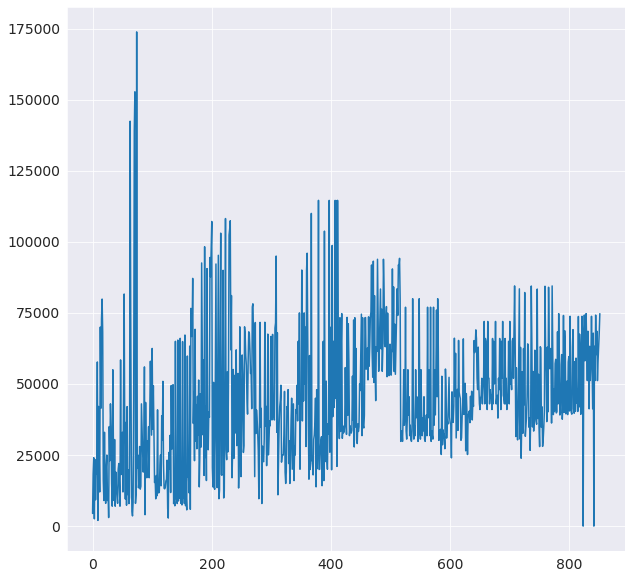

In [31]:
attendance_max = match_attendance[0]
for attendance in match_attendance:
    if attendance > attendance_max:
        attendance_max = attendance
index_max_attendance = np.unravel_index(np.argmax(match_attendance, axis=None), match_attendance.shape)
#att_max = np.amax(match_attendance)
#sns.lineplot(data=wc_matches_df["Attendance"])
plt.plot(match_attendance);
#attendance_max
#att_max
attendance_max


In [32]:
index_max_attendance[0]

74

Therefore, we can see that the maximum number of spectators a match had was 173850 people.

In [33]:
year_max = int(wc_matches_df.Year[index_max_attendance[0]])
home_max = wc_matches_df["Home Team Name"][index_max_attendance[0]]
away_max = wc_matches_df["Away Team Name"][index_max_attendance[0]]
stadium_max = wc_matches_df.Stadium[index_max_attendance[0]]
city_max = wc_matches_df.City[index_max_attendance[0]]

print('The World Cup Match with maximum spectators was held in the year {} for the match of {} versus {} at the stadium {}, {}'.format(year_max,home_max,away_max,stadium_max,city_max))


The World Cup Match with maximum spectators was held in the year 1950 for the match of Uruguay versus Brazil at the stadium Maracan� - Est�dio Jornalista M�rio Filho, Rio De Janeiro 


#### Q2: How many times have Spain made it to the top 4 of the World Cup?

In [34]:
#results_wc = np.array([wc_cup_df["Winner"],wc_cup_df["Runners-Up"], wc_cup_df["Third"] ,wc_cup_df["Fourth"]])
winners = np.array(wc_cup_df["Winner"])
runners_up =np.array(wc_cup_df["Runners-Up"])
third = np.array(wc_cup_df["Third"])
fourth = np.array(wc_cup_df["Fourth"])
w_ctr=0
run_ctr=0
th_ctr=0
fo_ctr=0
for winner in winners:
    if winner == "Spain":
        w_ctr+=1
for runner_up in runners_up:
    if runner_up == "Spain":
        run_ctr+=1
for th in third:
    if th == "Spain":
        th_ctr+=1
for fou in fourth:
    if fou == "Spain":
        fo_ctr+=1

In [35]:
print('Spain has won the World Cup {} time, has been the Runner Up {} time, has come third {} times and fourth {} time.'.format(w_ctr,run_ctr,th_ctr,fo_ctr))
print('Therefore, Spain has come to the top four {} times.'.format(w_ctr+run_ctr+th_ctr+fo_ctr))


Spain has won the World Cup 1 time, has been the Runner Up 0 time, has come third 0 times and fourth 1 time.
Therefore, Spain has come to the top four 2 times.


#### Q3: What percentage of matches played by a team in their home ground is won?

In [36]:
home_teams_array = np.array(wc_matches_df["Home Team Name"])
home_goals_array = np.array(wc_matches_df["Home Team Goals"])
away_goals_array = np.array(wc_matches_df["Away Team Goals"])
wins_count = 0
loss_count = 0
draw_count = 0


In [37]:
len_home_teams = len(home_teams_array)
for item in range(len_home_teams):
    if home_goals_array[item] > away_goals_array[item]:
        wins_count += 1
    elif home_goals_array[item] == away_goals_array[item]:
        draw_count +=1
    else:
        loss_count += 1
wins_count

488

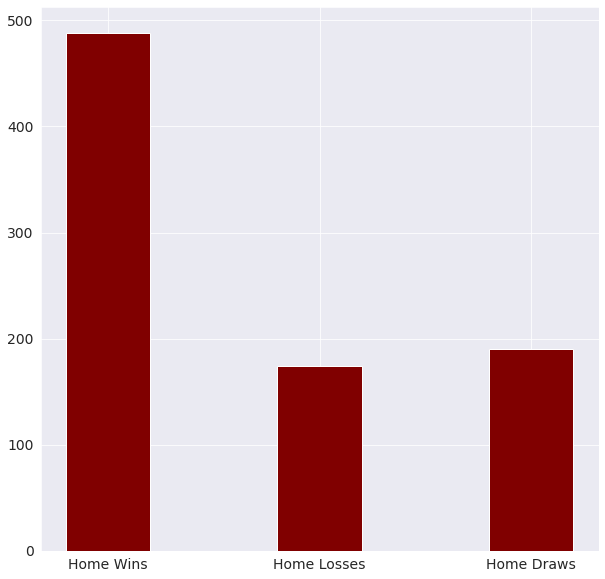

In [38]:
x_axis = np.arange(3)
y_axis = [wins_count, loss_count, draw_count]
plt.bar(x_axis, y_axis, color ='maroon',  
        width = 0.4)
plt.xticks(x_axis, ('Home Wins', 'Home Losses', 'Home Draws'))
plt.show()

In [39]:
print('Home wins = {} Home Losses = {} Home Draws = {}'.format(wins_count, loss_count, draw_count))
wins_draws_perc = ((wins_count+draw_count)/(wins_count + loss_count + draw_count))*100
print('Percentage of Home wins and draws = {}%' .format(int(wins_draws_perc)))

Home wins = 488 Home Losses = 174 Home Draws = 190
Percentage of Home wins and draws = 79%


#### Therefore, it is safe to make a conclusion that playing a match at a home ground can prove to be favourable.

#### Q4: What was the squad of players of Belgium in the match against Netherlands in the year 1998?

In [50]:
match_year = 1998
round_id = np.array([])
match_id = np.array([])

print("The squad of players that played the World Cup in 1998 for Belgium are: \n")

for i in range(len_home_teams):
    if wc_matches_df["Year"][i] == match_year:
        if wc_matches_df["Home Team Name"][i] == "Belgium" or wc_matches_df["Home Team Name"][i] == "Belgium" :
            round_id = np.append( round_id, np.array(wc_matches_df["RoundID"][i]))
            match_id = np.append( round_id, np.array(wc_matches_df["MatchID"][i]))

match_id 

The squad of players that played the World Cup in 1998 for Belgium are: 



array([1014., 1014., 8765.])

#### Q5: Which team had the highest ratio of wins to losses in the year 2010?

Let us save and upload our work to Jovian before continuing.

In [51]:
import jovian

In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "radhikag99/radhika-course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/radhikag99/radhika-course-project


'https://jovian.ml/radhikag99/radhika-course-project'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [53]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()